In [1]:
import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import econtools as econ
import econtools.metrics as mt
import math

In [6]:
df, meta = pyreadstat.read_sav("df.sav")

In [7]:
# school type F3S01003

df['schooltype'].value_counts()

0.0    1487
7.0     913
1.0     210
5.0      64
2.0      60
3.0       9
4.0       3
6.0       1
Name: schooltype, dtype: int64

In [8]:
#pyreadstat.write_sav(df, 'df.sav')

### educational background ### 0. 둘다 고졸 이하 / 1. 한명 대졸 / 2. 두명 대졸 이상

In [9]:
df_HH1, meta = pyreadstat.read_sav("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/1-12차년도 DATA(SPSS)/1차년도(2004) DATA/중학교 3학년생 코호트/by_m_household.sav")
df_HH3, meta = pyreadstat.read_sav("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/1-12차년도 DATA(SPSS)/3차년도(2006) DATA/중학교 3학년생 코호트/f2_m_household.sav")
df_HH4, meta = pyreadstat.read_sav("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/1-12차년도 DATA(SPSS)/4차년도(2007) DATA/중학교 3학년생 코호트/f3_m_household.sav")


In [10]:
print(len(df_HH1))
print(len(df_HH3))
print(len(df_HH4))

1951
1684
2711


In [11]:
#관계
df_HH1.BYH01001.value_counts()
#2002 mother/ 2001 father

2002.0    1564
2001.0     346
1002.0      22
1001.0       5
4011.0       4
4001.0       4
1004.0       3
3001.0       2
4002.0       1
Name: BYH01001, dtype: int64

In [12]:
#residence
df_HH1.BYH01006.value_counts()

1.0    1919
2.0      32
Name: BYH01006, dtype: int64

In [13]:
#residence_not
df_HH1.BYH01007.value_counts()
#대부분 1: 학업, 직장/ 5: 불화

-5.0    1919
 1.0      23
 5.0       5
 3.0       2
 7.0       1
 4.0       1
Name: BYH01007, dtype: int64

In [14]:
#eduational background 
#5. highschool/ 7.4년제 대학/ 4 중학교 /3. 초등학교
df_HH1.BYH01008.value_counts()

 5.0    965
 7.0    378
 4.0    239
 3.0    126
 6.0     99
 2.0     71
 8.0     52
 9.0     17
-3.0      4
Name: BYH01008, dtype: int64

In [16]:
df_HH1.BYH05001.value_counts() 
#5. 박사로 갈 수록 학력수준 높아짐 1= 고등학교 이하


3.0    1226
5.0     381
2.0     178
4.0     140
1.0      26
Name: BYH05001, dtype: int64

In [30]:
df_HH1.BYH06002.value_counts()
#고교평준화
#1. 찬성 2. 반대 3. 모르겠다

1.0    1042
3.0     501
2.0     408
Name: BYH06002, dtype: int64

In [32]:
df_HH1.BYH06001.value_counts()
#정부정책 1관심없음

4.0    733
3.0    570
5.0    391
2.0    228
1.0     29
Name: BYH06001, dtype: int64

In [36]:
#삶 중요 1 #2. 소질 적성/ 1. 배우자
df_HH1.BYH07001.value_counts()

2.0     691
1.0     508
8.0     411
6.0     127
4.0      78
3.0      51
7.0      30
10.0     29
5.0      20
9.0       6
Name: BYH07001, dtype: int64

In [34]:
# 직업이유 1. money / 3. 자아실현
df_HH1.BYH07003.value_counts()

1.0    849
3.0    726
4.0    197
2.0    179
Name: BYH07003, dtype: int64

In [33]:
# 성공요인 = 자식과 비교하기
df_HH1.BYH07004.value_counts()

2.0    1237
4.0     346
3.0     236
1.0      61
5.0      43
7.0      13
8.0      10
6.0       5
Name: BYH07004, dtype: int64

보호자

In [37]:
#보호자 BYH10001
df_HH1.BYH10001.value_counts()

1.0    1767
3.0      97
2.0      63
4.0      18
6.0       6
Name: BYH10001, dtype: int64

In [38]:
#parents
df_HH1.BYH10002.value_counts()

 1.0    1736
 3.0     112
 2.0      79
-5.0      24
Name: BYH10002, dtype: int64

In [18]:
df_HH3.F2H01001.value_counts()
df_HH3.F2H01003.value_counts() #보호자 변동된 사람들 

-5.0    1644
 3.0      16
 1.0      13
 2.0       8
 4.0       2
 5.0       1
Name: F2H01003, dtype: int64

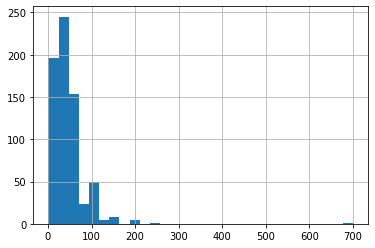

In [29]:
# 사교육비
df_HH3[df_HH3["F2H04005"]>0]["F2H04005"].hist(bins=30)